In [9]:
import pandas as pd

# Basic Inspection and Exploration:
# Problem 1 - Data Read, Write and Inspect:
# task1
df = pd.read_csv("bank.csv")

# task2
df.info()

# (a)
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)

# (b)
for col in obj_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# (c)
df.isnull().sum()

# task3
df_numeric = df.drop(columns=obj_cols) # removing all object(string) columns
df_numeric.to_csv("banknumericdata.csv", index=False)

# task4
df_numeric = pd.read_csv("banknumericdata.csv")
df_numeric.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pou

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
import pandas as pd

# Problem 2 - Data Imputations:
# task1
df_medical = pd.read_csv("medical_students_dataset.csv")

# task2
df_medical.info()
null_counts = df_medical.isnull().sum()
print(null_counts)
missing_cols = null_counts[null_counts > 0].index
print("Columns with missing values:", list(missing_cols))

# task3
df_medical.isnull().sum()
# All columns in the dataset are complete; there are no missing values to fill. Therefore, no imputation is required.

# task4
duplicate_count = df_medical.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
df_medical = df_medical.drop_duplicates()
print("Number of duplicate rows after removal:", df_medical.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

In [36]:
import pandas as pd

# 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

# Problem 1
df = pd.read_csv("Titanic-Dataset.csv")

cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_subset = df[cols]
df_first_class = df_subset[df_subset['Pclass'] == 1]  # filtering and collecting only those with pclass as 1

fare_mean = df_first_class['Fare'].mean()     # calculating mean of fare column
fare_median = df_first_class['Fare'].median() # calculating median of fare column
fare_max = df_first_class['Fare'].max()       # calculating max of fare column
fare_min = df_first_class['Fare'].min()       # calculating min of fare column

print("Mean:", fare_mean)
print("Median:", fare_median)
print("Maximum:", fare_max)
print("Minimum:", fare_min)

# Problem 2
null_age_count = df_first_class['Age'].isnull().sum()
df_first_class = df_first_class.dropna(subset=['Age'])
print("Number of null values in Age:", null_age_count)
print("Number of null values in Age after dropping:", df_first_class['Age'].isnull().sum())

# Problem 3
# task1
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
df_encoded.head()

# task2
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

# task3
df = df.drop(columns=['Embarked'])
df.head()

# task4
df.head()


Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0
Number of null values in Age: 30
Number of null values in Age after dropping: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-1845020265.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_sex.index, y=mean_survival_by_sex.values, palette="pastel")


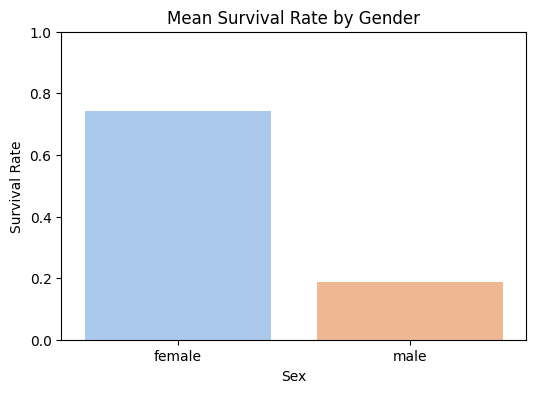

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 4
df = pd.read_csv("Titanic-Dataset.csv")
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)

plt.figure(figsize=(6,4))
sns.barplot(x=mean_survival_by_sex.index, y=mean_survival_by_sex.values, palette="pastel")
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.ylim(0, 1)
plt.show()

      Sex Embarked  Survived
0  female        C  0.876712
1  female        Q  0.750000
2  female        S  0.689655
3    male        C  0.305263
4    male        Q  0.073171
5    male        S  0.174603


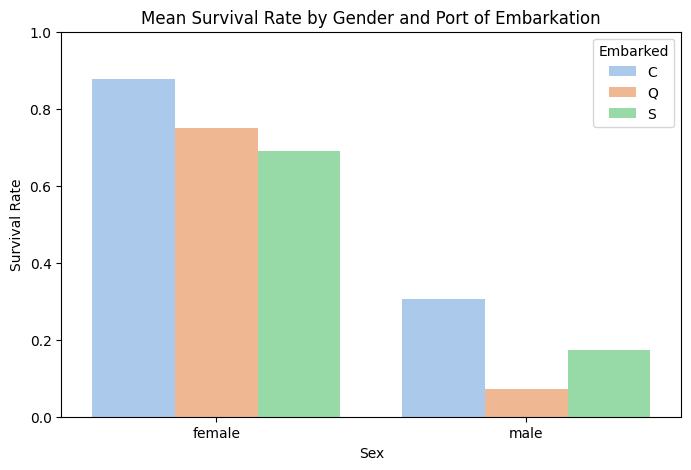

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 5
df = pd.read_csv("Titanic-Dataset.csv")
survival_by_sex_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()
print(survival_by_sex_embarked)

plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=survival_by_sex_embarked, palette="pastel")
plt.title("Mean Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.ylim(0,1)
plt.legend(title='Embarked')
plt.show()